/tmp/ipykernel_17217/3102916113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_DataFrame_1['category'] = 'H3K27ac_no_H3K4me3'
/tmp/ipykernel_17217/3102916113.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_DataFrame_2['category'] = 'H3K27ac_with_H3K4me3'
/tmp/ipykernel_17217/3102916113.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

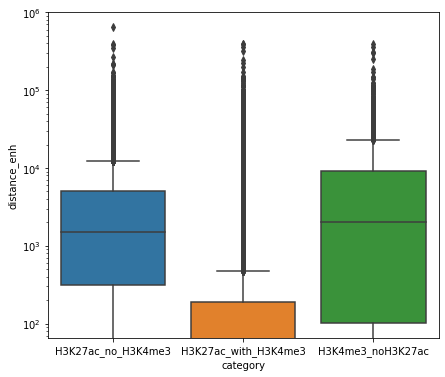

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colnames=['Experiment_Info1', 'Experiment_Info2', 'Experiment_Info3', 'Experiment_Info4', 'Experiment_Info5','Experiment_Info6','Experiment_Info7','Experiment_Info8', 'Experiment_Info9', 'Experiment_Info10', 'Experiment_Info11', 'Experiment_Info12', 'Experiment_Info13', 'Experiment_Info14', 'Experiment_Info15', 'Experiment_Info16', 'distance_enh']

df_1=pd.read_csv('closest_TSS_to_chr_wt_H3K27ac_noH3K4me3_peaks', sep='\t', comment='#', names=colnames, header=None, index_col=False)
distance_DataFrame_1=df_1[['distance_enh']]
distance_DataFrame_1['category'] = 'H3K27ac_no_H3K4me3'

df_2=pd.read_csv('closest_TSS_to_chr_wt_H3K27ac_withH3K4me3_peaks', sep='\t', comment='#', names=colnames, header=None, index_col=False)
distance_DataFrame_2=df_2[['distance_enh']]
distance_DataFrame_2['category'] = 'H3K27ac_with_H3K4me3'

df_3=pd.read_csv('closest_TSS_to_chr_wt_H3K4me3_noH3K27ac_peaks', sep='\t', comment='#', names=colnames, header=None, index_col=False)
distance_DataFrame_3=df_3[['distance_enh']]
distance_DataFrame_3['category'] = 'H3K4me3_noH3K27ac'

distance_DataFrame=pd.concat((distance_DataFrame_1, distance_DataFrame_2, distance_DataFrame_3), axis = 0)
distance_DataFrame

filtered_distance_DataFrame = distance_DataFrame[distance_DataFrame['distance_enh'] < 50000 ] 

f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
gfg = sns.boxplot(data = distance_DataFrame , x = 'category' , y = 'distance_enh' )

distance_DataFrame.groupby("category").distance_enh.describe().unstack()
distance_DataFrame_1['distance_enh'].median()
distance_DataFrame_2['distance_enh'].median()
plt.savefig("H3K27ac_distance_to_TSS.svg",format='svg')